In [28]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv("merged_output.csv")
df.head()

/var/folders/jk/26c0nrvd30sbw9k4_2ns250c0000gn/T/ipykernel_92421/1192622700.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("merged_output.csv")


,__typename_Rating,adminReviewedAt_Rating,attendanceMandatory_Rating,clarityRating_Rating,class_Rating,comment_Rating,createdByUser_Rating,date_Rating,difficultyRating_Rating,flagStatus_Rating,...,thumbs_Rating,thumbsDownTotal_Rating,thumbsUpTotal_Rating,wouldTakeAgain_Rating,ProfessorName,Department,SchoolName,LegacyId,NumRatings,predictedGender
0,Rating,2014-10-12 19:53:44 +0000 UTC,NaN,5.0,PH1C,genius enthusiastic really cares that we learn...,False,2014-10-12 19:51:32 +0000 UTC,3.0,UNFLAGGED,...,[],0.0,0.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male
1,Rating,NaN,NaN,4.0,PHYS1,this guy actually sat down with me and went ov...,False,2005-12-08 02:15:58 +0000 UTC,2.0,UNFLAGGED,...,[{'computerId': '7610E82DC63E5465E4DECE93C5AB4...,0.0,2.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male
2,Rating,NaN,NaN,2.0,PH1BC,seemed sort of scary to me lectures really had...,False,2005-06-01 22:21:35 +0000 UTC,5.0,UNFLAGGED,...,[{'computerId': '7610E82DC63E5465E4DECE93C5AB4...,1.0,0.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male
3,Rating,NaN,NaN,5.0,PH1BC,no comments,False,2005-02-13 22:58:06 +0000 UTC,3.0,UNFLAGGED,...,[{'computerId': '2D777623F4F23069E44333A863E40...,0.0,1.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male
4,Rating,NaN,NaN,3.0,PH1BC,he made fun of me gt o,False,2004-06-04 01:14:40 +0000 UTC,4.0,UNFLAGGED,...,[],0.0,0.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male


In [30]:
df.isnull().sum()

__typename_Rating                   0
adminReviewedAt_Rating         488176
attendanceMandatory_Rating    1492877
clarityRating_Rating                0
class_Rating                      138
comment_Rating                   1533
createdByUser_Rating                0
date_Rating                         0
difficultyRating_Rating             0
flagStatus_Rating                   0
grade_Rating                  1658767
helpfulRating_Rating                0
id_Rating                           0
isForCredit_Rating                  0
isForOnlineClass_Rating             0
legacyId_Rating                     0
ratingTags_Rating             1787132
teacherNote_Rating            2966818
textbookUse_Rating             452105
thumbs_Rating                       0
thumbsDownTotal_Rating              0
thumbsUpTotal_Rating                0
wouldTakeAgain_Rating         1764775
ProfessorName                       0
Department                          0
SchoolName                          0
LegacyId    

In [31]:
df.describe()

,clarityRating_Rating,difficultyRating_Rating,helpfulRating_Rating,legacyId_Rating,textbookUse_Rating,thumbsDownTotal_Rating,thumbsUpTotal_Rating,wouldTakeAgain_Rating,LegacyId,NumRatings
count,2.967600e+06,2.967600e+06,2.967600e+06,2.967600e+06,2.515495e+06,2.967600e+06,2.967600e+06,1.202825e+06,2.967600e+06,2.967600e+06
mean,3.652856e+00,3.012952e+00,3.686165e+00,2.352545e+07,2.702768e+00,3.294100e-01,5.767752e-01,7.445788e-01,1.160729e+06,9.084621e+01
std,1.490245e+00,1.245152e+00,1.509440e+00,1.074216e+07,2.129707e+00,2.445038e+00,4.187278e+00,4.360979e-01,8.756415e+05,3.271672e+02
min,1.000000e+00,1.000000e+00,-1.000000e+00,6.000000e+01,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00
25%,2.000000e+00,2.000000e+00,2.000000e+00,1.585092e+07,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.247150e+05,1.500000e+01
50%,4.000000e+00,3.000000e+00,4.000000e+00,2.491652e+07,3.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.049763e+06,3.600000e+01
75%,5.000000e+00,4.000000e+00,5.000000e+00,3.287393e+07,5.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.939739e+06,8.200000e+01
max,5.000000e+00,5.000000e+00,5.000000e+00,3.900157e+07,5.000000e+00,9.070000e+02,4.015000e+03,1.000000e+00,2.987551e+06,5.987000e+03


In [32]:
df.count()

__typename_Rating             2967600
adminReviewedAt_Rating        2479424
attendanceMandatory_Rating    1474723
clarityRating_Rating          2967600
class_Rating                  2967462
comment_Rating                2966067
createdByUser_Rating          2967600
date_Rating                   2967600
difficultyRating_Rating       2967600
flagStatus_Rating             2967600
grade_Rating                  1308833
helpfulRating_Rating          2967600
id_Rating                     2967600
isForCredit_Rating            2967600
isForOnlineClass_Rating       2967600
legacyId_Rating               2967600
ratingTags_Rating             1180468
teacherNote_Rating                782
textbookUse_Rating            2515495
thumbs_Rating                 2967600
thumbsDownTotal_Rating        2967600
thumbsUpTotal_Rating          2967600
wouldTakeAgain_Rating         1202825
ProfessorName                 2967600
Department                    2967600
SchoolName                    2967600
LegacyId    

In [33]:
df['ProfessorName'].nunique()

181370

In [34]:
df["teacherNote_Rating"].unique()

array([nan,
       "{'comment': 'Sorry that you felt this way.  Wondering how I could make the assignments more clear.  They are open ended design problems - so - is it possible that un-clear and open-ended are being confused?  Would like a bit more discussion on this one.  ', 'createdAt': '2020-05-14 17:45:14 +0000 UTC', 'flagStatus': 'REVIEWED', 'id': 'VGVhY2hlck5vdGVzLTg2NzU=', 'legacyId': 8675, 'teacherId': '128816', 'updatedAt': '2020-05-14 17:45:14 +0000 UTC'}",
       "{'comment': 'To clarify, there is just one article I authored assigned to the class. Assigning it does not advance my career, but it does benefit students in that they learn about foundational work in the field. This is a 400-level course and a reading-intensive course. I encourage you to reach out to me to discuss ways of improving your learning experience.', 'createdAt': '2020-04-13 18:01:34 +0000 UTC', 'flagStatus': 'REVIEWED', 'id': 'VGVhY2hlck5vdGVzLTgzOTI=', 'legacyId': 8392, 'teacherId': '2462821', 'updated

In [35]:
df_teacher_notes = df[["ProfessorName","teacherNote_Rating"]]

In [36]:
df_teacher_notes.dropna(inplace=True)

/var/folders/jk/26c0nrvd30sbw9k4_2ns250c0000gn/T/ipykernel_92421/4272807102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teacher_notes.dropna(inplace=True)


In [37]:
df_teacher_notes

,ProfessorName,teacherNote_Rating
2561,Dan Lewis,{'comment': 'Sorry that you felt this way. Wo...
46122,Adriana de Souza e Silva,"{'comment': 'To clarify, there is just one art..."
47366,John Kuzenski,{'comment': 'Many students feel the opposite w...
47375,John Kuzenski,{'comment': 'Students with known *documented* ...
47376,John Kuzenski,{'comment': 'I know students that are failing ...
...,...,...
2919505,Amr El Zawily,{'comment': 'Thank you so much. I appreciate y...
2919506,Amr El Zawily,{'comment': 'Thank you so much. I appreciate y...
2919507,Amr El Zawily,{'comment': 'Thank you so much. This course by...
2919508,Amr El Zawily,{'comment': 'Thank you. I appreciate it. I wou...


In [38]:
common_asian_names = [
    'Chen', 'Chang', 'Chao', 'Cheng', 'Cho', 'Choi', 'Chong', 'Chou', 'Chow', 'Chu', 'Feng', 'Gao', 'Guo', 'Ho',
    'Hsu', 'Huang', 'Jiang', 'Kim', 'Koh', 'Kuo', 'Lee', 'Leong', 'Li', 'Liang', 'Lim', 'Lin', 'Liu', 'Lu', 'Ma',
    'Ng', 'Nguyen', 'Ong', 'Park', 'Phan', 'Shen', 'Singh', 'Song', 'Tan', 'Tang', 'Wang', 'Wong', 'Wu', 'Xu',
    'Yang', 'Yao', 'Yeh', 'Yen', 'Yeo', 'Yong', 'Yu', 'Yuan', 'Yuen', 'Zhang', 'Zhao', 'Zhou',
    'Patel', 'Shah', 'Khan', 'Singh', 'Sharma', 'Gupta', 'Kumar', 'Joshi', 'Desai', 'Mehta', 'Choudhury', 'Malhotra',
    'Gandhi', 'Verma', 'Reddy', 'Bose', 'Sinha', 'Rao', 'Thakur', 'Roy', 'Das', 'Pandey', 'Naidu', 'Menon', 'Iyer',
    'Nair', 'Raj', 'Chatterjee', 'Mukherjee'
]

In [39]:
def is_asian(name):
    if any(asian_name in name for asian_name in common_asian_names):
        return "Yes"
    else:
        return "No"

df['AsianProfessor'] = df['ProfessorName'].apply(is_asian)

In [40]:
df['AsianProfessor'].count()

2967600

In [41]:
counts = df['AsianProfessor'].value_counts()

print(counts)

No     2458299
Yes     509301
Name: AsianProfessor, dtype: int64


In [49]:
verification_data = df.sample(n=200, random_state=42)  

true_predictions = 0
false_predictions = 0

for index, row in verification_data.iterrows():
    print("Professor Name:", row['ProfessorName'])
    print("Predicted as Asian Professor:", row['AsianProfessor'])
    verification = input("Is this prediction true or false? (Enter 't' for true, 'f' for false): ").lower()
    if verification == 't':
        true_predictions += 1
    elif verification == 'f':
        false_predictions += 1

print("Total True Predictions:", true_predictions)
print("Total False Predictions:", false_predictions)

Professor Name: Amy Fountain
Predicted as Asian Professor: No
Is this prediction true or false? (Enter 't' for true, 'f' for false): f
Professor Name: Vesna Zderic
Predicted as Asian Professor: No
Is this prediction true or false? (Enter 't' for true, 'f' for false): f
Professor Name: David Johnson
Predicted as Asian Professor: No
Is this prediction true or false? (Enter 't' for true, 'f' for false): f
Professor Name: Russell Ravert
Predicted as Asian Professor: No
Is this prediction true or false? (Enter 't' for true, 'f' for false): f
Professor Name: Paul Coulis
Predicted as Asian Professor: No
Is this prediction true or false? (Enter 't' for true, 'f' for false): f
Professor Name: Bennett Schwartz
Predicted as Asian Professor: No
Is this prediction true or false? (Enter 't' for true, 'f' for false): f
Professor Name: Charles Wilkinson
Predicted as Asian Professor: No
Is this prediction true or false? (Enter 't' for true, 'f' for false): f
Professor Name: Justin Cosner
Predicted as A

In [ ]:
verification_data = asian_professors.sample(n=200, random_state=1)  

true_predictions = 0
false_predictions = 0

for index, row in verification_data.iterrows():
    print("Professor Name:", row['ProfessorName'])
    print("Predicted as Asian Professor:", row['Asian Professor'])
    verification = input("Is this prediction true or false? (Enter 't' for true, 'f' for false): ").lower()
    if verification == 't':
        true_predictions += 1
    elif verification == 'f':
        false_predictions += 1

print("Total True Predictions:", true_predictions)
print("Total False Predictions:", false_predictions)

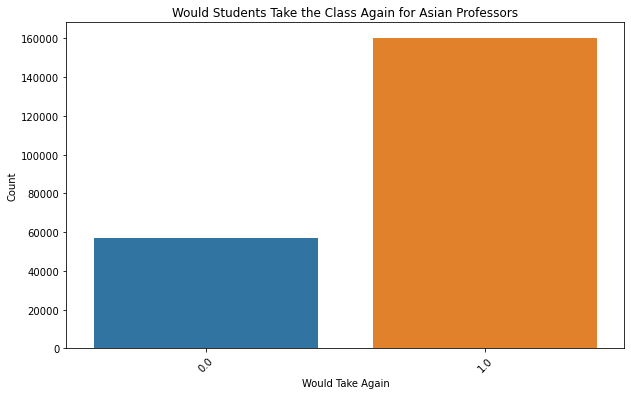

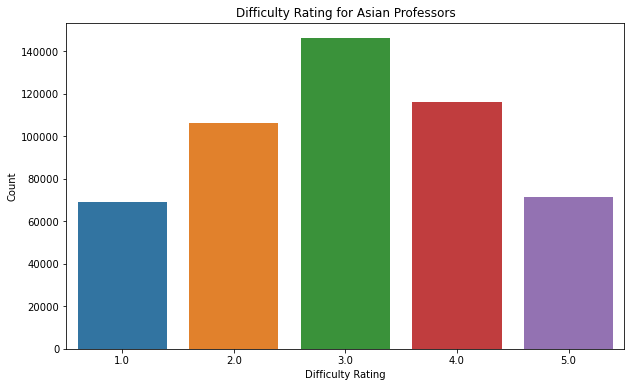

In [52]:
asian_professors_data = df[df['AsianProfessor'] == 'Yes']


plt.figure(figsize=(10, 6))
sns.countplot(x='wouldTakeAgain_Rating', data=asian_professors_data)
plt.title('Would Students Take the Class Again for Asian Professors')
plt.xlabel('Would Take Again')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='difficultyRating_Rating', data=asian_professors_data)
plt.title('Difficulty Rating for Asian Professors')
plt.xlabel('Difficulty Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
asian_professors_data = df[df['AsianProfessor'] == 'Yes']


plt.figure(figsize=(10, 6))
sns.countplot(x='adminReviewedAt_Rating', data=asian_professors_data)
plt.title('Students Ratings for the Class for Asian Professors')
plt.xlabel('Would Take Again')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

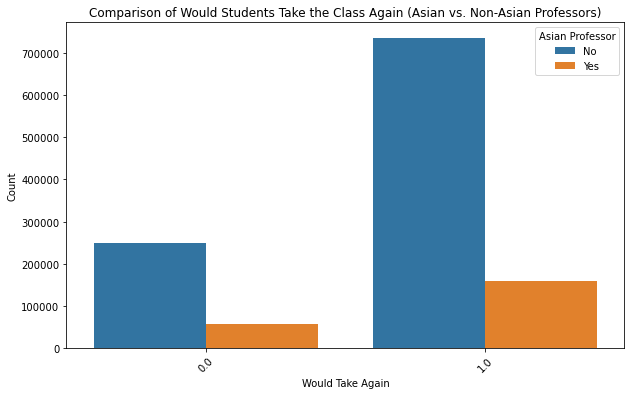

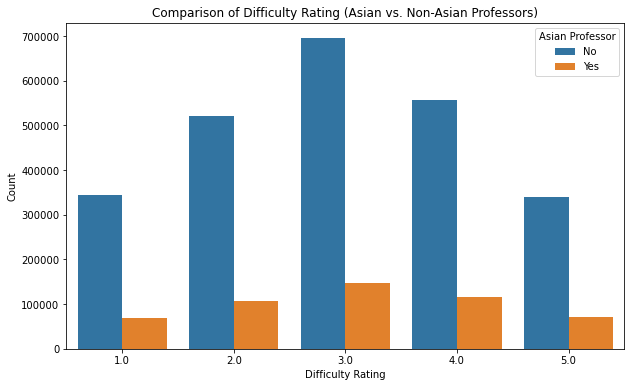

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(x='wouldTakeAgain_Rating', hue='AsianProfessor', data=df)
plt.title('Comparison of Would Students Take the Class Again (Asian vs. Non-Asian Professors)')
plt.xlabel('Would Take Again')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Asian Professor', loc='upper right')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='difficultyRating_Rating', hue='AsianProfessor', data=df)
plt.title('Comparison of Difficulty Rating (Asian vs. Non-Asian Professors)')
plt.xlabel('Difficulty Rating')
plt.ylabel('Count')
plt.legend(title='Asian Professor', loc='upper right')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='adminReviewedAt_Rating', hue='AsianProfessor', data=df)
plt.title('Comparison of  Students Ratings for the Class(Asian vs. Non-Asian Professors)')
plt.xlabel('Would Take Again')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Asian Professor', loc='upper right')
plt.show()

In [ ]:
# Set visualization style
sns.set_style("whitegrid")

# Define custom tick labels
tick_labels = {1: "Yes", 0: "No"}

# Plot the data
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df, x='University', y='wouldTakeAgain_Rating', hue='University_Category', dodge=True, ci=None)
plt.title('Would Take Again Ratings by University')
plt.xlabel('University')
plt.ylabel('Average Would Take Again Rating')
plt.legend(title='University Category', loc='upper right')

# Add predicted gender and Asian professor as additional hues
sns.color_palette("colorblind")  # Use a colorblind-friendly palette
for i, gender in enumerate(df['PredictedGender'].unique()):
    sns.barplot(data=df[df['PredictedGender'] == gender], x='University', y='wouldTakeAgain_Rating', hue='AsianProfessor',
                dodge=True, alpha=0.5, palette="Set2", ci=None)

# Set custom tick labels for the y-axis
ax.set_yticklabels([tick_labels[int(x.get_text())] for x in ax.get_yticklabels()])

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [102]:

# Define preprocessing function with error handling
def preprocess_text(text):
    try:
        # Convert text to string if it's not already
        if not isinstance(text, str):
            text = str(text)
        # Tokenization
        tokens = word_tokenize(text)
        # Remove stop words
        stop_words = set(stopwords.words('english'))
        filtered_tokens = [word for word in tokens if word not in stop_words]
        # Remove punctuation
        filtered_tokens = [word for word in filtered_tokens if word not in string.punctuation]
        return filtered_tokens
    except Exception as e:
        # Handle unexpected data or exceptions
        print(f"Error preprocessing text: {e}")
        return []

# Preprocess comments
df['preprocessed_comments'] = df['comment_Rating'].apply(preprocess_text)



In [104]:
df.head()

,__typename_Rating,adminReviewedAt_Rating,attendanceMandatory_Rating,clarityRating_Rating,class_Rating,comment_Rating,createdByUser_Rating,date_Rating,difficultyRating_Rating,flagStatus_Rating,...,thumbsDownTotal_Rating,thumbsUpTotal_Rating,wouldTakeAgain_Rating,ProfessorName,Department,SchoolName,LegacyId,NumRatings,predictedGender,preprocessed_comments
0,Rating,2014-10-12 19:53:44 +0000 UTC,NaN,5.0,PH1C,genius enthusiastic really cares that we learn...,False,2014-10-12 19:51:32 +0000 UTC,3.0,UNFLAGGED,...,0.0,0.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male,"[genius, enthusiastic, really, cares, learn, l..."
1,Rating,NaN,NaN,4.0,PHYS1,this guy actually sat down with me and went ov...,False,2005-12-08 02:15:58 +0000 UTC,2.0,UNFLAGGED,...,0.0,2.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male,"[guy, actually, sat, went, building, circuit, ..."
2,Rating,NaN,NaN,2.0,PH1BC,seemed sort of scary to me lectures really had...,False,2005-06-01 22:21:35 +0000 UTC,5.0,UNFLAGGED,...,1.0,0.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male,"[seemed, sort, scary, lectures, really, nothin..."
3,Rating,NaN,NaN,5.0,PH1BC,no comments,False,2005-02-13 22:58:06 +0000 UTC,3.0,UNFLAGGED,...,0.0,1.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male,[comments]
4,Rating,NaN,NaN,3.0,PH1BC,he made fun of me gt o,False,2004-06-04 01:14:40 +0000 UTC,4.0,UNFLAGGED,...,0.0,0.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male,"[made, fun, gt]"


In [115]:
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Assuming you have a DataFrame named df with a column 'comment_Rating' containing the comments and 'wouldTakeAgain_Rating' containing the scores

# Filter the dataset to include only records for Asian professors
asian_df = df[df['AsianProfessor'] == 'Yes']

# Filter further to include only records with low 'wouldTakeAgain_Rating' score
low_score_asian_df = asian_df[asian_df['wouldTakeAgain_Rating'] <= 2]

# Extract comments for these records
comments = low_score_asian_df['comment_Rating'].dropna()

# Tokenize the comments into individual words and preprocess them
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
preprocessed_comments = []
for comment in comments:
    words = word_tokenize(comment.lower())
    filtered_words = [word for word in words if word not in stop_words and word not in punctuation]
    preprocessed_comments.extend(filtered_words)

# Count the frequency of each word
word_freq = Counter(preprocessed_comments)

# Get the most common words
most_common_words = word_freq.most_common(10)

print("Most common words for low 'would take again' score for Asian professors:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

Most common words for low 'would take again' score for Asian professors:
class: 205283
professor: 89635
lectures: 52201
take: 51767
really: 49212
easy: 49110
students: 46967
great: 41569
good: 38204
exams: 35888


In [21]:
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Assuming you have a DataFrame named df with a column 'comment_Rating' containing the comments and 'wouldTakeAgain_Rating' containing the scores

# Filter the dataset to include only records for Asian professors
asian_df = df[df['AsianProfessor'] == 'Yes']

# Filter further to include only records with low 'wouldTakeAgain_Rating' score
low_score_asian_df = asian_df[asian_df['wouldTakeAgain_Rating'] <= 2]

# Extract comments for these records
comments = low_score_asian_df['comment_Rating'].dropna()

# Tokenize the comments into individual words and preprocess them
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
preprocessed_comments = []
for comment in comments:
    words = word_tokenize(comment.lower())
    filtered_words = [word for word in words if word not in stop_words and word not in punctuation and ('not' in word or 'difficult' in word)]
    preprocessed_comments.extend(filtered_words)

# Count the frequency of each word
word_freq = Counter(preprocessed_comments)

# Get the most common negative words
most_common_words = word_freq.most_common(10)

print("Most common negative words for low 'would take again' score for Asian professors:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")


Most common negative words for low 'would take again' score for Asian professors:
difficult: 19494
notes: 14635
nothing: 4259
another: 3522
note: 2485
difficulty: 1097
monotone: 571
notice: 273
difficulties: 203
monotonous: 158


In [25]:
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Assuming you have a DataFrame named df with a column 'comment_Rating' containing the comments and 'wouldTakeAgain_Rating' containing the scores

# Filter the dataset to include only records for Asian professors
asian_df = df[df['AsianProfessor'] == 'No']

# Filter further to include only records with low 'wouldTakeAgain_Rating' score
low_score_asian_df = asian_df[asian_df['wouldTakeAgain_Rating'] <= 2]

# Extract comments for these records
comments = low_score_asian_df['comment_Rating'].dropna()

# Tokenize the comments into individual words and preprocess them
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
preprocessed_comments = []
for comment in comments:
    words = word_tokenize(comment.lower())
    filtered_words = [word for word in words if word not in stop_words and word not in punctuation]
    preprocessed_comments.extend(filtered_words)

# Count the frequency of each word
word_freq = Counter(preprocessed_comments)

# Get the most common words
most_common_words = word_freq.most_common(10)

print("Most common words for low 'would take again' score for non-Asian professors:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

Most common words for low 'would take again' score for non-Asian professors:
class: 958621
professor: 402731
take: 245255
lectures: 239870
really: 230842
easy: 228984
students: 209062
great: 196156
good: 172120
lot: 158659


In [26]:
# Filter the dataset to include only records for non-Asian professors
non_asian_df = df[df['AsianProfessor'] == 'No']

# Filter further to include only records with low 'wouldTakeAgain_Rating' score
low_score_non_asian_df = non_asian_df[non_asian_df['wouldTakeAgain_Rating'] <= 2]

# Extract comments for these records
non_asian_comments = low_score_non_asian_df['comment_Rating'].dropna()

# Tokenize the comments into individual words and preprocess them
preprocessed_non_asian_comments = []
for comment in non_asian_comments:
    words = word_tokenize(comment.lower())
    filtered_words = [word for word in words if word not in stop_words and word not in punctuation and ('not' in word or 'difficult' in word)]
    preprocessed_non_asian_comments.extend(filtered_words)

# Count the frequency of each word
non_asian_word_freq = Counter(preprocessed_non_asian_comments)

# Get the most common negative words for non-Asian professors
non_asian_most_common_words = non_asian_word_freq.most_common(10)

print("\nMost common negative words for low 'would take again' score for non-Asian professors:")
for word, freq in non_asian_most_common_words:
    print(f"{word}: {freq}")


Most common negative words for low 'would take again' score for non-Asian professors:
difficult: 83703
notes: 66397
nothing: 19708
another: 15892
note: 10752
difficulty: 4635
monotone: 2906
notice: 1205
difficulties: 798
monotonous: 783


In [114]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
import string

# Define preprocessing function to extract phrases
def preprocess_text(text):
    try:
        # Convert text to string if it's not already
        if not isinstance(text, str):
            text = str(text)
        # Convert text to lowercase
        text_lower = text.lower()
        # Tokenization into phrases (bigrams)
        tokens = word_tokenize(text_lower)
        stop_words = set(stopwords.words('english'))
        filtered_tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
        phrases = list(ngrams(filtered_tokens, 2))  # Change the number to get different length phrases (e.g., 3 for trigrams)
        return phrases
    except Exception as e:
        # Handle unexpected data or exceptions
        print(f"Error preprocessing text: {e}")
        return []

# Preprocess comments
df['preprocessed_phrases'] = df['comment_Rating'].apply(preprocess_text)

In [16]:
def calculate_score(df):
    scores = {'Asian': {}, 'Non-Asian': {}}
    for index, row in df.iterrows():
        professor = row['ProfessorName']
        rating = row['wouldTakeAgain_Rating']
        comment = row['comment_Rating']
        is_asian = row['AsianProfessor']  # Corrected column name
        # Check if comment is not NaN
        if isinstance(comment, str):
            # Assign score based on negative comment
            score = -1 if 'not' in comment.lower() or 'difficult' in comment.lower() else 0
            # Update total score for professor
            if is_asian == 'Yes':
                if professor in scores['Asian']:
                    scores['Asian'][professor] += score
                else:
                    scores['Asian'][professor] = score
            else:
                if professor in scores['Non-Asian']:
                    scores['Non-Asian'][professor] += score
                else:
                    scores['Non-Asian'][professor] = score
    return scores
# Calculate scores for Asian and non-Asian professors
professor_scores = calculate_score(df)


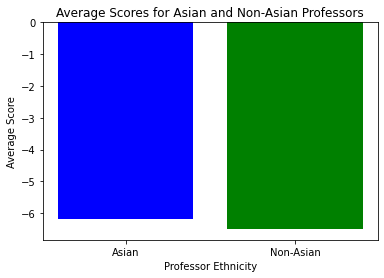

In [18]:
# Calculate average scores for Asian and non-Asian professors
avg_score_asian = sum(professor_scores['Asian'].values()) / len(professor_scores['Asian'])
avg_score_non_asian = sum(professor_scores['Non-Asian'].values()) / len(professor_scores['Non-Asian'])

# Plot overall average scores
plt.bar(['Asian', 'Non-Asian'], [avg_score_asian, avg_score_non_asian], color=['blue', 'green'])
plt.xlabel('Professor Ethnicity')
plt.ylabel('Average Score')
plt.title('Average Scores for Asian and Non-Asian Professors')
plt.show()

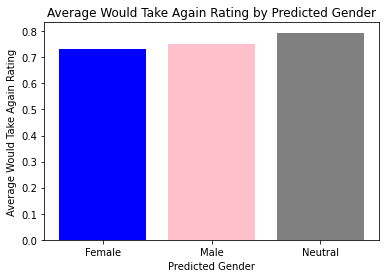

In [19]:
# Filter the dataset to include only records with non-null 'predictedGender' and 'wouldTakeAgain_Rating'
filtered_df = df.dropna(subset=['predictedGender', 'wouldTakeAgain_Rating'])

# Group by predicted gender and calculate the mean 'wouldTakeAgain_Rating' for each group
gender_avg_rating = filtered_df.groupby('predictedGender')['wouldTakeAgain_Rating'].mean()

# Plot the bar chart
plt.bar(gender_avg_rating.index, gender_avg_rating.values, color=['blue', 'pink', 'gray'])
plt.xlabel('Predicted Gender')
plt.ylabel('Average Would Take Again Rating')
plt.title('Average Would Take Again Rating by Predicted Gender')
plt.show()

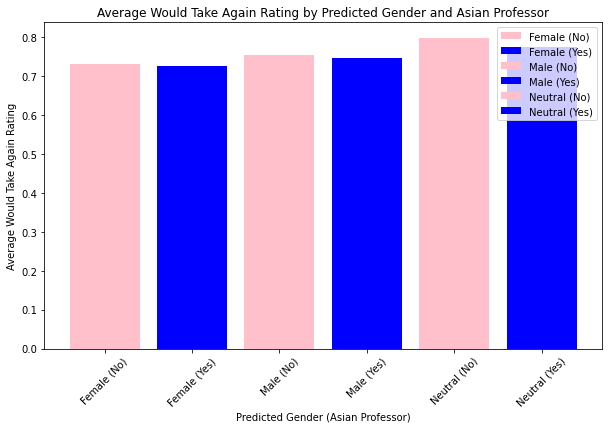

In [20]:
# Filter the dataset to include only records with non-null 'predictedGender', 'wouldTakeAgain_Rating', and 'AsianProfessor'
filtered_df = df.dropna(subset=['predictedGender', 'wouldTakeAgain_Rating', 'AsianProfessor'])

# Group by predicted gender and AsianProfessor, and calculate the mean 'wouldTakeAgain_Rating' for each group
gender_asian_avg_rating = filtered_df.groupby(['predictedGender', 'AsianProfessor'])['wouldTakeAgain_Rating'].mean()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over each category (gender and AsianProfessor)
for gender in gender_asian_avg_rating.index.levels[0]:
    for asian in gender_asian_avg_rating.index.levels[1]:
        avg_rating = gender_asian_avg_rating.loc[(gender, asian)]
        ax.bar(f'{gender} ({asian})', avg_rating, label=f'{gender} ({asian})', color='blue' if asian == 'Yes' else 'pink')

ax.set_xlabel('Predicted Gender (Asian Professor)')
ax.set_ylabel('Average Would Take Again Rating')
ax.set_title('Average Would Take Again Rating by Predicted Gender and Asian Professor')
ax.legend()
plt.xticks(rotation=45)
plt.show()

In [42]:
df['Department'].nunique()

1250

In [69]:
# Extract unique elements from a ProfessorName
unique_elements = df['ProfessorName'].unique()

# Create a new DataFrame with unique elements
prof_df = pd.DataFrame(unique_elements, columns=['UniqueProfessorNames'])

In [70]:
prof_df.count()

UniqueProfessorNames    181370
dtype: int64

In [71]:
# Extract unique elements from department
unique_elements = df['Department'].unique()

# Create a new DataFrame with unique elements
dept_df = pd.DataFrame(unique_elements, columns=['Departments'])

In [72]:
dept_df.count()

Departments    1250
dtype: int64

In [73]:
dept_df.head(50)

,Departments
0,Science
1,Computer Science
2,Mathematics
3,Chemistry
4,Engineering
5,Physics
6,Economics
7,Philosophy
8,Biology
9,Geology


In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer

dept_df = pd.DataFrame(data)

# Define categories
categories = ['STEM', 'Business', 'Humanities', 'Others']

# Create a corpus where each document represents a category
corpus = {
    'STEM': 'science technology engineering mathematics',
    'Business': 'business marketing finance',
    'Humanities': 'philosophy languages literature history art anthropology music religion sociology',
    'Others': 'political'
}

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the corpus using TF-IDF vectorizer
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus.values())

# Get feature names (terms)
terms = tfidf_vectorizer.get_feature_names_out()

# Transform the categories using TF-IDF vectorizer
categories_tfidf = tfidf_vectorizer.transform(dept_df['Departments'])

# Find the most relevant category for each type
most_relevant_category_indices = categories_tfidf.argmax(axis=1).flatten()
most_relevant_categories = [categories[i] for i in most_relevant_category_indices]

# Add the most relevant category to the DataFrame
df['Relevant_Category'] = most_relevant_categories

TypeError: only integer scalar arrays can be converted to a scalar index

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Define the categories for each group
STEM = ['Science','Computer Science', 'Mathematics', 'Chemistry', 'Engineering', 'Physics', 'Biology', 'Geology', 'Astronomy', 'Information Science', 'Electrical Engineering', 'Cognitive Science', 'Mechanical Engineering']
BUSINESS = ['Economics', 'Business', 'Finance', 'Marketing', 'International Studies', 'Criminal Justice']
HUMANITIES = ['Philosophy', 'Languages', 'Humanities', 'English', 'History', 'Theology', 'Art History', 'Anthropology', 'Linguistics', 'Literature', 'Classics', 'Religious Studies', 'Religion', 'Comparative Literature', 'Fine Arts', 'Music', 'Geography', 'Sociology', 'Social Work', 'Near Eastern Studies', 'Political Science', 'Social Science', 'History']
OTHERS = ['Culinary Arts', 'Psychology', 'Education', 'Health Science', 'Communication', 'Technology', 'Film','Music']

# Combine all categories
all_categories = STEM + BUSINESS + HUMANITIES + OTHERS

# Create a DataFrame with categories
category_df = pd.DataFrame({'Departments': all_categories})

# Define the labels for each category
category_labels = ['STEM'] * len(STEM) + ['BUSINESS'] * len(BUSINESS) + ['HUMANITIES'] * len(HUMANITIES) + ['OTHERS'] * len(OTHERS)

# Add the labels to the DataFrame
category_df['Category'] = category_labels

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Vectorize the department names from the first 50 records in dept_df
X_train = tfidf_vectorizer.fit_transform(dept_df['Departments'][:50])

# Encode the category labels for the first 50 records
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(category_df['Category'])

# Train a Support Vector Machine (SVM) classifier on the first 50 records
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Predict categories for the first 50 records
predicted_categories_train = svm_classifier.predict(X_train)

# Map the predicted categories back to the department names for the first 50 records
predicted_category_labels_train = label_encoder.inverse_transform(predicted_categories_train)

# Add the predicted categories to the original DataFrame for the first 50 records
dept_df['Predicted_Category'] = predicted_category_labels_train[:50]

# Calculate accuracy for the first 50 records
accuracy_train = accuracy_score(y_train, predicted_categories_train)

# Display the accuracy for the first 50 records
print(f"Accuracy for the first 50 records: {accuracy_train}")

# Vectorize the department names from the remaining 1200 records in dept_df
X_test = tfidf_vectorizer.transform(dept_df['Departments'][50:])

# Predict categories for the remaining 1200 records
predicted_categories_test = svm_classifier.predict(X_test)

# Map the predicted categories back to the department names for the remaining 1200 records
predicted_category_labels_test = label_encoder.inverse_transform(predicted_categories_test)

# Add the predicted categories to the original DataFrame for the remaining 1200 records
dept_df['Predicted_Category'][50:] = predicted_category_labels_test

# Display the resulting DataFrame with the predicted categories
print(dept_df)


ValueError: Length of values (50) does not match length of index (1250)

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Define the categories for each group
STEM = ['Science','Computer Science', 'Mathematics', 'Chemistry', 'Engineering', 'Physics', 'Biology', 'Geology', 'Astronomy', 'Information Science', 'Electrical Engineering', 'Cognitive Science', 'Mechanical Engineering']
BUSINESS = ['Economics', 'Business', 'Finance', 'Marketing', 'International Studies', 'Criminal Justice']
HUMANITIES = ['Philosophy', 'Languages', 'Humanities', 'English', 'History', 'Theology', 'Art History', 'Anthropology', 'Linguistics', 'Literature', 'Classics', 'Religious Studies', 'Religion', 'Comparative Literature', 'Fine Arts', 'Music', 'Geography', 'Sociology', 'Social Work', 'Near Eastern Studies', 'Political Science', 'Social Science', 'History']
OTHERS = ['Culinary Arts', 'Psychology', 'Education', 'Health Science', 'Communication', 'Technology', 'Film','Music']

# Combine all categories
all_categories = STEM + BUSINESS + HUMANITIES + OTHERS

# Create a DataFrame with categories
category_df = pd.DataFrame({'Departments': all_categories})

# Define the labels for each category
category_labels = ['STEM'] * len(STEM) + ['BUSINESS'] * len(BUSINESS) + ['HUMANITIES'] * len(HUMANITIES) + ['OTHERS'] * len(OTHERS)

# Add the labels to the DataFrame
category_df['Category'] = category_labels

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Vectorize the department names from the first 50 records in dept_df
X_train = tfidf_vectorizer.fit_transform(dept_df['Departments'][:50])

# Encode the category labels for the first 50 records
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(category_df['Category'])

# Train a Support Vector Machine (SVM) classifier on the first 50 records
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Predict categories for the first 50 records
predicted_categories_train = svm_classifier.predict(X_train)

# Map the predicted categories back to the department names for the first 50 records
predicted_category_labels_train = label_encoder.inverse_transform(predicted_categories_train)

# Add the predicted categories to the original DataFrame for the first 50 records
dept_df['Predicted_Category'][:50] = predicted_category_labels_train

# Calculate accuracy for the first 50 records
accuracy_train = accuracy_score(y_train, predicted_categories_train)

# Display the accuracy for the first 50 records
print(f"Accuracy for the first 50 records: {accuracy_train}")

# Vectorize the department names from the remaining 1200 records in dept_df
X_test = tfidf_vectorizer.transform(dept_df['Departments'][50:])

# Predict categories for the remaining 1200 records
predicted_categories_test = svm_classifier.predict(X_test)

# Map the predicted categories back to the department names for the remaining 1200 records
predicted_category_labels_test = label_encoder.inverse_transform(predicted_categories_test)

# Add the predicted categories to the original DataFrame for the remaining 1200 records
dept_df['Predicted_Category'][50:] = predicted_category_labels_test

# Display the resulting DataFrame with the predicted categories
print(dept_df)


Accuracy for the first 50 records: 0.96
                         Departments Predicted_Category
0                            Science               STEM
1                   Computer Science               STEM
2                        Mathematics               STEM
3                          Chemistry               STEM
4                        Engineering               STEM
...                              ...                ...
1245   Atmospheric  Oceanic Sciences         HUMANITIES
1246        Professional Development         HUMANITIES
1247                 Italian Studies         HUMANITIES
1248  Technology amp Operations Mgmt             OTHERS
1249  Atmospheric & Oceanic Sciences         HUMANITIES

[1250 rows x 2 columns]


In [87]:
dept_df.count()

Departments           1250
Predicted_Category    1250
dtype: int64

In [88]:
category_counts = dept_df['Predicted_Category'].value_counts()

# Print the total count of each category
print(category_counts)

HUMANITIES    882
STEM          206
OTHERS        102
BUSINESS       60
Name: Predicted_Category, dtype: int64


In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Define the categories for each group
STEM = ['Science','Computer Science', 'Mathematics', 'Chemistry', 'Engineering', 'Physics', 'Biology', 'Geology', 'Astronomy', 'Information Science', 'Electrical Engineering', 'Cognitive Science', 'Mechanical Engineering']
BUSINESS = ['Economics', 'Business', 'Finance', 'Marketing', 'International Studies', 'Criminal Justice']
HUMANITIES = ['Philosophy', 'Languages', 'Humanities', 'English', 'History', 'Theology', 'Art History', 'Anthropology', 'Linguistics', 'Literature', 'Classics', 'Religious Studies', 'Religion', 'Comparative Literature', 'Fine Arts', 'Music', 'Geography', 'Sociology', 'Social Work', 'Near Eastern Studies', 'Political Science', 'Social Science', 'History']
OTHERS = ['Culinary Arts', 'Psychology', 'Education', 'Health Science', 'Communication', 'Technology', 'Film','Music']

# Combine all categories
all_categories = STEM + BUSINESS + HUMANITIES + OTHERS

# Create a DataFrame with categories
category_df = pd.DataFrame({'Department': all_categories})

# Define the labels for each category
category_labels = ['STEM'] * len(STEM) + ['BUSINESS'] * len(BUSINESS) + ['HUMANITIES'] * len(HUMANITIES) + ['OTHERS'] * len(OTHERS)

# Add the labels to the DataFrame
category_df['Category'] = category_labels
category_df

,Department,Category
0,Science,STEM
1,Computer Science,STEM
2,Mathematics,STEM
3,Chemistry,STEM
4,Engineering,STEM
5,Physics,STEM
6,Biology,STEM
7,Geology,STEM
8,Astronomy,STEM
9,Information Science,STEM


In [107]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Vectorize the department names from the first 50 records in df
X_train = tfidf_vectorizer.fit_transform(df['Department'][:50])

# Encode the category labels for the first 50 records
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(category_df['Category'])

# Train a Support Vector Machine (SVM) classifier on the first 50 records
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Predict categories for the first 50 records
predicted_categories_train = svm_classifier.predict(X_train)

# Map the predicted categories back to the department names for the first 50 records
predicted_category_labels_train = label_encoder.inverse_transform(predicted_categories_train)

# Create the 'Predicted_Category' column in the DataFrame for the first 50 records
df['Predicted_Category'] = ''

# Add the predicted categories to the 'Predicted_Category' column for the first 50 records
df.loc[:49, 'Predicted_Category'] = predicted_category_labels_train

# Calculate accuracy for the first 50 records
accuracy_train = accuracy_score(y_train, predicted_categories_train)

# Display the accuracy for the first 50 records
print(f"Accuracy for the first 50 records: {accuracy_train}")

# Vectorize the department names from the remaining 1200 records in df
X_test = tfidf_vectorizer.transform(df['Department'][50:])

# Predict categories for the remaining 1200 records
predicted_categories_test = svm_classifier.predict(X_test)

# Map the predicted categories back to the department names for the remaining 1200 records
predicted_category_labels_test = label_encoder.inverse_transform(predicted_categories_test)

# Add the predicted categories to the 'Predicted_Category' column for the remaining 1200 records
df.loc[50:, 'Predicted_Category'] = predicted_category_labels_test

# Display the resulting DataFrame with the predicted categories
df.head(10)


Accuracy for the first 50 records: 0.78


,__typename_Rating,adminReviewedAt_Rating,attendanceMandatory_Rating,clarityRating_Rating,class_Rating,comment_Rating,createdByUser_Rating,date_Rating,difficultyRating_Rating,flagStatus_Rating,...,thumbsUpTotal_Rating,wouldTakeAgain_Rating,ProfessorName,Department,SchoolName,LegacyId,NumRatings,predictedGender,AsianProfessor,Predicted_Category
0,Rating,2014-10-12 19:53:44 +0000 UTC,NaN,5.0,PH1C,genius enthusiastic really cares that we learn...,False,2014-10-12 19:51:32 +0000 UTC,3.0,UNFLAGGED,...,0.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male,No,STEM
1,Rating,NaN,NaN,4.0,PHYS1,this guy actually sat down with me and went ov...,False,2005-12-08 02:15:58 +0000 UTC,2.0,UNFLAGGED,...,2.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male,No,STEM
2,Rating,NaN,NaN,2.0,PH1BC,seemed sort of scary to me lectures really had...,False,2005-06-01 22:21:35 +0000 UTC,5.0,UNFLAGGED,...,0.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male,No,STEM
3,Rating,NaN,NaN,5.0,PH1BC,no comments,False,2005-02-13 22:58:06 +0000 UTC,3.0,UNFLAGGED,...,1.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male,No,STEM
4,Rating,NaN,NaN,3.0,PH1BC,he made fun of me gt o,False,2004-06-04 01:14:40 +0000 UTC,4.0,UNFLAGGED,...,0.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male,No,STEM
5,Rating,NaN,NaN,5.0,PH2AB,amazing philosophy toward teaching concerned w...,False,2002-08-20 15:23:20 +0000 UTC,4.0,UNFLAGGED,...,1.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male,No,STEM
6,Rating,2012-04-06 22:51:02 +0000 UTC,NaN,5.0,BI150,amazing prof,False,2012-04-06 22:49:45 +0000 UTC,3.0,UNFLAGGED,...,0.0,NaN,Henry Lester,Science,California Institute of Technology,90542,13,Male,No,STEM
7,Rating,2011-11-08 19:44:54 +0000 UTC,NaN,5.0,CNS150,lester is an amazing and caring educator he ma...,False,2011-11-08 19:25:53 +0000 UTC,4.0,UNFLAGGED,...,0.0,NaN,Henry Lester,Science,California Institute of Technology,90542,13,Male,No,STEM
8,Rating,NaN,NaN,3.0,BI1,no comments,False,2006-10-06 04:14:09 +0000 UTC,2.0,UNFLAGGED,...,0.0,NaN,Henry Lester,Science,California Institute of Technology,90542,13,Male,No,STEM
9,Rating,NaN,NaN,5.0,BI1,extremely interested in the students tries to ...,False,2005-05-12 18:42:36 +0000 UTC,3.0,UNFLAGGED,...,0.0,NaN,Henry Lester,Science,California Institute of Technology,90542,13,Male,No,STEM


In [100]:
df.count()

__typename_Rating             2967600
adminReviewedAt_Rating        2479424
attendanceMandatory_Rating    1474723
clarityRating_Rating          2967600
class_Rating                  2967462
comment_Rating                2966067
createdByUser_Rating          2967600
date_Rating                   2967600
difficultyRating_Rating       2967600
flagStatus_Rating             2967600
grade_Rating                  1308833
helpfulRating_Rating          2967600
id_Rating                     2967600
isForCredit_Rating            2967600
isForOnlineClass_Rating       2967600
legacyId_Rating               2967600
ratingTags_Rating             1180468
teacherNote_Rating                782
textbookUse_Rating            2515495
thumbs_Rating                 2967600
thumbsDownTotal_Rating        2967600
thumbsUpTotal_Rating          2967600
wouldTakeAgain_Rating         1202825
ProfessorName                 2967600
Department                    2967600
SchoolName                    2967600
LegacyId    

In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Define the categories for each group
STEM = ['Science', 'Computer Science','Geography','Technology','Mathematics', 'Chemistry', 'Engineering', 'Physics', 'Biology', 'Geology', 'Astronomy', 'Information Science', 'Electrical Engineering', 'Cognitive Science', 'Mechanical Engineering','Engineering','chemistry']
BUSINESS = ['Economics', 'Business', 'Finance', 'Marketing', 'International Studies', 'Criminal Justice','Accounts','Human Resources','Management']
HUMANITIES = ['Philosophy', 'Languages', 'Humanities', 'English', 'History', 'Theology', 'Art History','Classics', 'Anthropology', 'Linguistics', 'Literature', 'Religious Studies','Linguistics', 'Classics','Literature', 'Religion', 'Comparative Literature']
OTHERS = ['Culinary Arts', 'Psychology', 'Education', 'Health Science', 'Communication', 'Technology', 'Film']

# Combine all categories
all_categories = STEM + BUSINESS + HUMANITIES + OTHERS

# Create a DataFrame with categories
category_df = pd.DataFrame({'Department': all_categories})

# Define the labels for each category
category_labels = ['STEM'] * len(STEM) + ['BUSINESS'] * len(BUSINESS) + ['HUMANITIES'] * len(HUMANITIES) + ['OTHERS'] * len(OTHERS)

# Add the labels to the DataFrame
category_df['Category'] = category_labels

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Vectorize the department names from the first 50 records in df
X_train = tfidf_vectorizer.fit_transform(df['Department'][:50])

# Encode the category labels for the first 50 records
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(category_df['Category'])

# Train a Support Vector Machine (SVM) classifier on the first 50 records
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Predict categories for the first 50 records
predicted_categories_train = svm_classifier.predict(X_train)

# Map the predicted categories back to the department names for the first 50 records
predicted_category_labels_train = label_encoder.inverse_transform(predicted_categories_train)

# Create the 'Predicted_Category' column in the DataFrame for the first 50 records
df['Predicted_Category'] = ''

# Add the predicted categories to the 'Predicted_Category' column for the first 50 records
df.loc[:49, 'Predicted_Category'] = predicted_category_labels_train

# Calculate accuracy for the first 50 records
accuracy_train = accuracy_score(y_train, predicted_categories_train)

# Display the accuracy for the first 50 records
print(f"Accuracy for the first 50 records: {accuracy_train}")

# Vectorize the department names from the remaining 1200 records in df
X_test = tfidf_vectorizer.transform(df['Department'][50:])

# Predict categories for the remaining 1200 records
predicted_categories_test = svm_classifier.predict(X_test)

# Map the predicted categories back to the department names for the remaining 1200 records
predicted_category_labels_test = label_encoder.inverse_transform(predicted_categories_test)

# Add the predicted categories to the 'Predicted_Category' column for the remaining 1200 records
df.loc[50:, 'Predicted_Category'] = predicted_category_labels_test

# Display the resulting DataFrame with the predicted categories
df.head(10)


Accuracy for the first 50 records: 0.74


,__typename_Rating,adminReviewedAt_Rating,attendanceMandatory_Rating,clarityRating_Rating,class_Rating,comment_Rating,createdByUser_Rating,date_Rating,difficultyRating_Rating,flagStatus_Rating,...,thumbsUpTotal_Rating,wouldTakeAgain_Rating,ProfessorName,Department,SchoolName,LegacyId,NumRatings,predictedGender,AsianProfessor,Predicted_Category
0,Rating,2014-10-12 19:53:44 +0000 UTC,NaN,5.0,PH1C,genius enthusiastic really cares that we learn...,False,2014-10-12 19:51:32 +0000 UTC,3.0,UNFLAGGED,...,0.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male,No,STEM
1,Rating,NaN,NaN,4.0,PHYS1,this guy actually sat down with me and went ov...,False,2005-12-08 02:15:58 +0000 UTC,2.0,UNFLAGGED,...,2.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male,No,STEM
2,Rating,NaN,NaN,2.0,PH1BC,seemed sort of scary to me lectures really had...,False,2005-06-01 22:21:35 +0000 UTC,5.0,UNFLAGGED,...,0.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male,No,STEM
3,Rating,NaN,NaN,5.0,PH1BC,no comments,False,2005-02-13 22:58:06 +0000 UTC,3.0,UNFLAGGED,...,1.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male,No,STEM
4,Rating,NaN,NaN,3.0,PH1BC,he made fun of me gt o,False,2004-06-04 01:14:40 +0000 UTC,4.0,UNFLAGGED,...,0.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male,No,STEM
5,Rating,NaN,NaN,5.0,PH2AB,amazing philosophy toward teaching concerned w...,False,2002-08-20 15:23:20 +0000 UTC,4.0,UNFLAGGED,...,1.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male,No,STEM
6,Rating,2012-04-06 22:51:02 +0000 UTC,NaN,5.0,BI150,amazing prof,False,2012-04-06 22:49:45 +0000 UTC,3.0,UNFLAGGED,...,0.0,NaN,Henry Lester,Science,California Institute of Technology,90542,13,Male,No,STEM
7,Rating,2011-11-08 19:44:54 +0000 UTC,NaN,5.0,CNS150,lester is an amazing and caring educator he ma...,False,2011-11-08 19:25:53 +0000 UTC,4.0,UNFLAGGED,...,0.0,NaN,Henry Lester,Science,California Institute of Technology,90542,13,Male,No,STEM
8,Rating,NaN,NaN,3.0,BI1,no comments,False,2006-10-06 04:14:09 +0000 UTC,2.0,UNFLAGGED,...,0.0,NaN,Henry Lester,Science,California Institute of Technology,90542,13,Male,No,STEM
9,Rating,NaN,NaN,5.0,BI1,extremely interested in the students tries to ...,False,2005-05-12 18:42:36 +0000 UTC,3.0,UNFLAGGED,...,0.0,NaN,Henry Lester,Science,California Institute of Technology,90542,13,Male,No,STEM


In [132]:
category_counts = df['Predicted_Category'].value_counts()

# Print the total count of each category
print(category_counts)

HUMANITIES    2507323
STEM           207362
OTHERS         137149
BUSINESS       115766
Name: Predicted_Category, dtype: int64


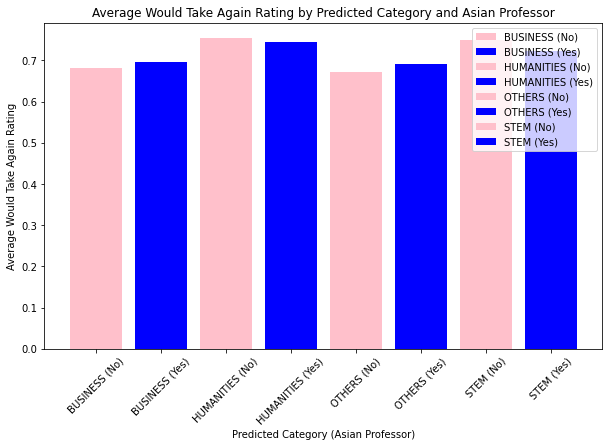

In [133]:
import matplotlib.pyplot as plt

# Filter the dataset to include only records with non-null 'Predicted_Category', 'wouldTakeAgain_Rating', and 'AsianProfessor'
filtered_df = df.dropna(subset=['Predicted_Category', 'wouldTakeAgain_Rating', 'AsianProfessor'])

# Group by predicted category and AsianProfessor, and calculate the mean 'wouldTakeAgain_Rating' for each group
category_asian_avg_rating = filtered_df.groupby(['Predicted_Category', 'AsianProfessor'])['wouldTakeAgain_Rating'].mean()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over each category (predicted category and AsianProfessor)
for category in category_asian_avg_rating.index.levels[0]:
    for asian in category_asian_avg_rating.index.levels[1]:
        avg_rating = category_asian_avg_rating.loc[(category, asian)]
        ax.bar(f'{category} ({asian})', avg_rating, label=f'{category} ({asian})', color='blue' if asian == 'Yes' else 'pink')

ax.set_xlabel('Predicted Category (Asian Professor)')
ax.set_ylabel('Average Would Take Again Rating')
ax.set_title('Average Would Take Again Rating by Predicted Category and Asian Professor')
ax.legend()
plt.xticks(rotation=45)
plt.show()


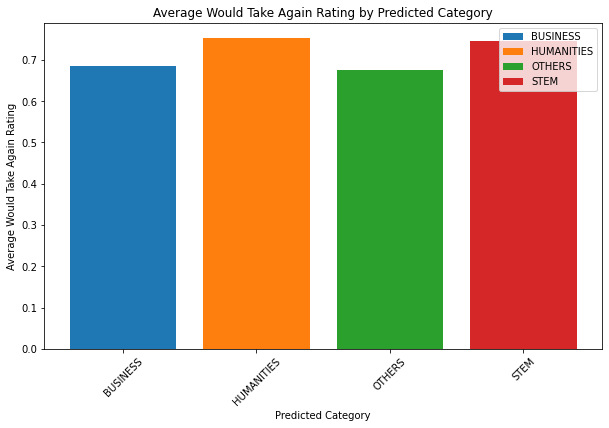

In [134]:
# Filter the dataset to include only records with non-null 'Predicted_Category' and 'wouldTakeAgain_Rating'
filtered_df = df.dropna(subset=['Predicted_Category', 'wouldTakeAgain_Rating'])

# Group by predicted category and calculate the mean 'wouldTakeAgain_Rating' for each group
category_avg_rating = filtered_df.groupby('Predicted_Category')['wouldTakeAgain_Rating'].mean()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over each predicted category
for category in category_avg_rating.index:
    avg_rating = category_avg_rating.loc[category]
    ax.bar(category, avg_rating, label=category)

ax.set_xlabel('Predicted Category')
ax.set_ylabel('Average Would Take Again Rating')
ax.set_title('Average Would Take Again Rating by Predicted Category')
ax.legend()
plt.xticks(rotation=45)
plt.show()

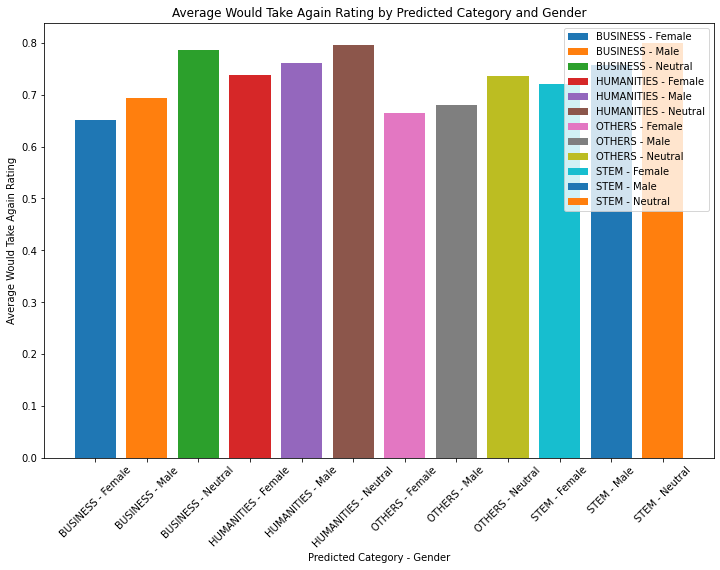

In [136]:
# Filter the dataset to include only records with non-null 'Predicted_Category', 'wouldTakeAgain_Rating', 'Gender', and 'AsianProfessor'
filtered_df = df.dropna(subset=['Predicted_Category', 'wouldTakeAgain_Rating', 'predictedGender'])

# Group by predicted category, gender, and calculate the mean 'wouldTakeAgain_Rating' for each group
category_gender_avg_rating = filtered_df.groupby(['Predicted_Category', 'predictedGender'])['wouldTakeAgain_Rating'].mean()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate over each predicted category and gender combination
for category, gender in category_gender_avg_rating.index:
    avg_rating = category_gender_avg_rating.loc[(category, gender)]
    ax.bar(f'{category} - {gender}', avg_rating, label=f'{category} - {gender}')

ax.set_xlabel('Predicted Category - Gender')
ax.set_ylabel('Average Would Take Again Rating')
ax.set_title('Average Would Take Again Rating by Predicted Category and Gender')
ax.legend()
plt.xticks(rotation=45)
plt.show()

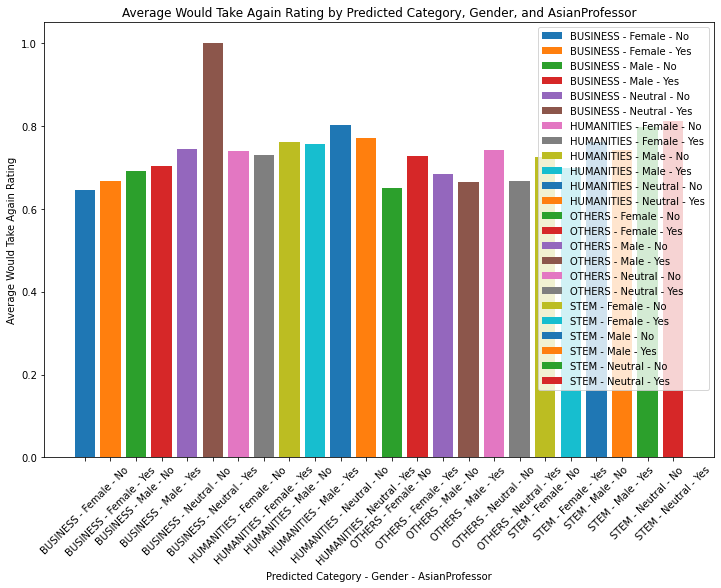

In [137]:
# Filter the dataset to include only records with non-null 'Predicted_Category', 'wouldTakeAgain_Rating', 'Gender', and 'AsianProfessor'
filtered_df = df.dropna(subset=['Predicted_Category', 'wouldTakeAgain_Rating', 'predictedGender', 'AsianProfessor'])

# Group by predicted category, gender, AsianProfessor and calculate the mean 'wouldTakeAgain_Rating' for each group
category_gender_asian_avg_rating = filtered_df.groupby(['Predicted_Category', 'predictedGender', 'AsianProfessor'])['wouldTakeAgain_Rating'].mean()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate over each predicted category, gender, and AsianProfessor combination
for category, gender, asian in category_gender_asian_avg_rating.index:
    avg_rating = category_gender_asian_avg_rating.loc[(category, gender, asian)]
    ax.bar(f'{category} - {gender} - {asian}', avg_rating, label=f'{category} - {gender} - {asian}')

ax.set_xlabel('Predicted Category - Gender - AsianProfessor')
ax.set_ylabel('Average Would Take Again Rating')
ax.set_title('Average Would Take Again Rating by Predicted Category, Gender, and AsianProfessor')
ax.legend()
plt.xticks(rotation=45)
plt.show()

In [138]:
import pandas as pd

# Data
universities_data = [
    {"Rank": 1, "University": "Massachusetts Institute of Technology (MIT)", "Type": "Private"},
    {"Rank": 2, "University": "Harvard University", "Type": "Private"},
    {"Rank": 3, "University": "Stanford University", "Type": "Private"},
    {"Rank": 4, "University": "University of California Berkeley (UCB)", "Type": "Public"},
    {"Rank": 5, "University": "University of Chicago", "Type": "Private"},
    {"Rank": 6, "University": "University of Pennsylvania", "Type": "Private"},
    {"Rank": 7, "University": "Cornell University", "Type": "Private"},
    {"Rank": 8, "University": "California Institute of Technology (Caltech)", "Type": "Private"},
    {"Rank": 9, "University": "Yale University", "Type": "Private"},
    {"Rank": 10, "University": "Princeton University", "Type": "Private"},
    {"Rank": 11, "University": "Columbia University", "Type": "Private"},
    {"Rank": 12, "University": "Johns Hopkins University", "Type": "Private"},
    {"Rank": 13, "University": "University of California, Los Angeles (UCLA)", "Type": "Public"},
    {"Rank": 14, "University": "University of Michigan-Ann Arbor", "Type": "Public"},
    {"Rank": 15, "University": "New York University (NYU)", "Type": "Private"},
    {"Rank": 16, "University": "Northwestern University", "Type": "Private"},
    {"Rank": 17, "University": "Carnegie Mellon University", "Type": "Private"},
    {"Rank": 18, "University": "Duke University", "Type": "Private"},
    {"Rank": 19, "University": "University of Texas at Austin", "Type": "Public"},
    {"Rank": 20, "University": "University of California, San Diego (UCSD)", "Type": "Public"},
    {"Rank": 21, "University": "University of Washington", "Type": "Public"},
    {"Rank": 22, "University": "University of Illinois at Urbana-Champaign", "Type": "Public"},
    {"Rank": 23, "University": "Brown University", "Type": "Private"},
    {"Rank": 24, "University": "Pennsylvania State University", "Type": "Public"},
    {"Rank": 25, "University": "Boston University", "Type": "Private"},
    {"Rank": 26, "University": "Georgia Institute of Technology (Georgia Tech)", "Type": "Public"},
    {"Rank": 27, "University": "Purdue University", "Type": "Public"},
    {"Rank": 28, "University": "University of Wisconsin-Madison", "Type": "Public"},
    {"Rank": 29, "University": "University of Southern California", "Type": "Private"},
    {"Rank": 30, "University": "University of California, Davis (UCD)", "Type": "Public"},
    {"Rank": 30, "University": "University of North Carolina, Chapel Hill", "Type": "Public"},
    {"Rank": 32, "University": "Texas A&M University", "Type": "Public"},
    {"Rank": 33, "University": "Michigan State University", "Type": "Public"},
    {"Rank": 34, "University": "Rice University", "Type": "Private"},
    {"Rank": 35, "University": "Ohio State University", "Type": "Public"},
    {"Rank": 36, "University": "Washington University in St. Louis", "Type": "Private"},
    {"Rank": 37, "University": "University of California, Santa Barbara (UCSB)", "Type": "Public"},
    {"Rank": 38, "University": "University of Florida", "Type": "Public"},
    {"Rank": 39, "University": "University of Maryland, College Park", "Type": "Public"},
    {"Rank": 40, "University": "Arizona State University", "Type": "Public"},
    {"Rank": 41, "University": "University of Minnesota, Twin Cities", "Type": "Public"},
    {"Rank": 42, "University": "Emory University", "Type": "Private"},
    {"Rank": 43, "University": "University of Pittsburgh", "Type": "Public"},
    {"Rank": 44, "University": "University of Rochester", "Type": "Private"},
    {"Rank": 45, "University": "Dartmouth College", "Type": "Private"},
    {"Rank": 46, "University": "University of Massachusetts, Amherst", "Type": "Public"},
    {"Rank": 47, "University": "Case Western Reserve University", "Type": "Private"},
    {"Rank": 48, "University": "University of Virginia", "Type": "Public"},
    {"Rank": 49, "University": "Vanderbilt University", "Type": "Private"},
    {"Rank": 50, "University": "University of Colorado at Boulder", "Type": "Public"},
    {"Rank": 51, "University": "University of California, Irvine (UCI)", "Type": "Public"},
    {"Rank": 52, "University": "North Carolina State University", "Type": "Public"},
    {"Rank": 53, "University": "University of Miami", "Type": "Private"},
    {"Rank": 54, "University": "University of Arizona", "Type": "Public"},
    {"Rank": 55, "University": "Georgetown University", "Type": "Private"},
    {"Rank": 56, "University": "Rutgers - The State University of New Jersey, New Brunswick", "Type": "Public"},
    {"Rank": 57, "University": "Virginia Polytechnic Institute (Virginia Tech)", "Type": "Public"},
    {"Rank": 58, "University": "University of Notre Dame", "Type": "Private"},
    {"Rank": 59, "University": "Indiana University Bloomington", "Type": "Public"},
    {"Rank": 60, "University": "University of Illinois, Chicago (UIC)", "Type": "Public"},
    {"Rank": 61, "University": "University of California, Santa Cruz (UCSC)", "Type": "Public"},
    {"Rank": 62, "University": "George Washington University", "Type": "Private"},
    {"Rank": 63, "University": "Yeshiva University", "Type": "Private"},
    {"Rank": 64, "University": "Northeastern University", "Type": "Private"},
    {"Rank": 65, "University": "Tufts University", "Type": "Private"},
    {"Rank": 66, "University": "University of Hawai'i at Manoa", "Type": "Public"},
    {"Rank": 67, "University": "Stony Brook University", "Type": "Public"},
    {"Rank": 68, "University": "Iowa State University", "Type": "Public"},
    {"Rank": 69, "University": "University of California, Riverside (UCR)", "Type": "Public"},
    {"Rank": 70, "University": "Colorado State University", "Type": "Public"},
    {"Rank": 71, "University": "University of Kansas", "Type": "Public"},
    {"Rank": 72, "University": "Washington State University", "Type": "Public"},
    {"Rank": 73, "University": "University of Utah", "Type": "Public"},
    {"Rank": 74, "University": "University of Connecticut", "Type": "Public"},
    {"Rank": 75, "University": "University of Tennessee, Knoxville", "Type": "Public"},
    {"Rank": 76, "University": "Florida State University", "Type": "Public"},
    {"Rank": 77, "University": "Colorado School of Mines", "Type": "Public"},
    {"Rank": 78, "University": "Illinois Institute of Technology", "Type": "Private"},
    {"Rank": 79, "University": "Missouri University of Science and Technology", "Type": "Public"},
    {"Rank": 80, "University": "University at Buffalo SUNY", "Type": "Public"},
    {"Rank": 80, "University": "University of Iowa", "Type": "Public"},
    {"Rank": 82, "University": "Rensselaer Polytechnic Institute", "Type": "Private"},
    {"Rank": 83, "University": "University of Delaware", "Type": "Public"},
    {"Rank": 84, "University": "Oregon State University", "Type": "Public"},
    {"Rank": 85, "University": "University of Georgia", "Type": "Public"},
    {"Rank": 86, "University": "University of Texas Dallas", "Type": "Public"},
    {"Rank": 87, "University": "City University of New York", "Type": "Public"},
    {"Rank": 88, "University": "Lehigh University", "Type": "Private"},
    {"Rank": 89, "University": "University of Nebraska - Lincoln", "Type": "Public"},
    {"Rank": 90, "University": "Florida International University", "Type": "Public"},
    {"Rank": 91, "University": "University of South Florida", "Type": "Public"},
    {"Rank": 92, "University": "University of South Carolina", "Type": "Public"},
    {"Rank": 93, "University": "University of Missouri, Columbia", "Type": "Public"},
    {"Rank": 94, "University": "University of Central Florida", "Type": "Public"},
    {"Rank": 95, "University": "Tulane University", "Type": "Private"},
    {"Rank": 96, "University": "Drexel University", "Type": "Private"},
    {"Rank": 97, "University": "Stevens Institute of Technology", "Type": "Private"},
    {"Rank": 98, "University": "Boston College", "Type": "Private"},
    {"Rank": 98, "University": "University of New Mexico", "Type": "Public"},
    {"Rank": 100, "University": "New Jersey Institute of Technology (NJIT)", "Type": "Public"},
    {"Rank": 100, "University": "The New School", "Type": "Private"},
    {"Rank": 100, "University": "University of Houston", "Type": "Public"},
    {"Rank": 100, "University": "University of Oklahoma", "Type": "Public"}
]

# Convert the list of dictionaries into a DataFrame
universities_df = pd.DataFrame(universities_data)

# Function to categorize universities as public or private based on their names
def categorize_university(university_name):
    # List of keywords indicating public universities
    public_keywords = ["University of", "State University", "Institute of Technology", "Polytechnic Institute", "City University"]
    # Check if any keyword indicating public university exists in the university name
    if any(keyword in university_name for keyword in public_keywords):
        return "Public"
    else:
        return "Private"

# Add another column to categorize the universities as public or private
universities_df['Category'] = universities_df['University'].apply(categorize_university)

# Display the DataFrame
print(universities_df)


     Rank                                   University     Type Category
0       1  Massachusetts Institute of Technology (MIT)  Private   Public
1       2                           Harvard University  Private  Private
2       3                          Stanford University  Private  Private
3       4      University of California Berkeley (UCB)   Public   Public
4       5                        University of Chicago  Private   Public
..    ...                                          ...      ...      ...
98     98                     University of New Mexico   Public   Public
99    100    New Jersey Institute of Technology (NJIT)   Public   Public
100   100                               The New School  Private  Private
101   100                        University of Houston   Public   Public
102   100                       University of Oklahoma   Public   Public

[103 rows x 4 columns]


In [141]:
# List of university names from the provided data
public_universities = [
    "University of California Berkeley (UCB)",
    "University of California, Los Angeles (UCLA)",
    "University of California, Davis (UCD)",
    "University of California, San Diego (UCSD)",
    "University of California, Santa Barbara (UCSB)",
    "University of Illinois at Urbana-Champaign",
    "University of Texas at Austin",
    "University of Washington",
    "University of Wisconsin-Madison",
    "Pennsylvania State University",
    "Michigan State University",
    "Ohio State University",
    "University of North Carolina, Chapel Hill",
    "Texas A&M University",
    "Washington University in St. Louis",
    "University of Florida",
    "University of Maryland, College Park",
    "Arizona State University",
    "University of Minnesota, Twin Cities",
    "University of Pittsburgh",
    "University of Massachusetts, Amherst",
    "University of California, Riverside (UCR)",
    "University of Colorado at Boulder",
    "University of California, Irvine (UCI)",
    "North Carolina State University",
    "University of Arizona",
    "University of Georgia",
    "University of California, Santa Cruz (UCSC)",
    "University of Hawai'i at Manoa",
    "Stony Brook University",
    "University of California, Riverside (UCR)",
    "Iowa State University",
    "Colorado State University",
    "University of Kansas",
    "Washington State University",
    "University of Utah",
    "University of Connecticut",
    "University of Tennessee, Knoxville",
    "Florida State University",
    "Colorado School of Mines",
    "Missouri University of Science and Technology",
    "University at Buffalo SUNY",
    "University of Iowa",
    "University of Delaware",
    "Oregon State University",
    "University of Texas Dallas",
    "City University of New York"
]

# Function to categorize universities as public or private
def categorize_university(university_name):
    if any(public_uni in university_name for public_uni in public_universities):
        return "Public"
    else:
        return "Private"

# Add a new column 'University_Category' to df
df['University_Category'] = df['SchoolName'].apply(categorize_university)

# Display the updated DataFrame
print(df[['SchoolName', 'University_Category']].head(50))


                            SchoolName University_Category
0   California Institute of Technology             Private
1   California Institute of Technology             Private
2   California Institute of Technology             Private
3   California Institute of Technology             Private
4   California Institute of Technology             Private
5   California Institute of Technology             Private
6   California Institute of Technology             Private
7   California Institute of Technology             Private
8   California Institute of Technology             Private
9   California Institute of Technology             Private
10  California Institute of Technology             Private
11  California Institute of Technology             Private
12  California Institute of Technology             Private
13  California Institute of Technology             Private
14  California Institute of Technology             Private
15  California Institute of Technology             Priva

In [142]:
category_counts = df['SchoolName'].value_counts()

# Print the total count of each category
print(category_counts)

University of Central Florida                 136383
Brigham Young University                      117059
Grand Valley State University                 111010
Florida International University              101184
George Mason University                        98693
                                               ...  
Union College                                      4
Texas A&M University Health Science Center         4
Gardner-Webb University                            3
Peter A. Allard School of Law                      1
Universite Laval                                   1
Name: SchoolName, Length: 491, dtype: int64


In [144]:
df['University_Category'].nunique()

2

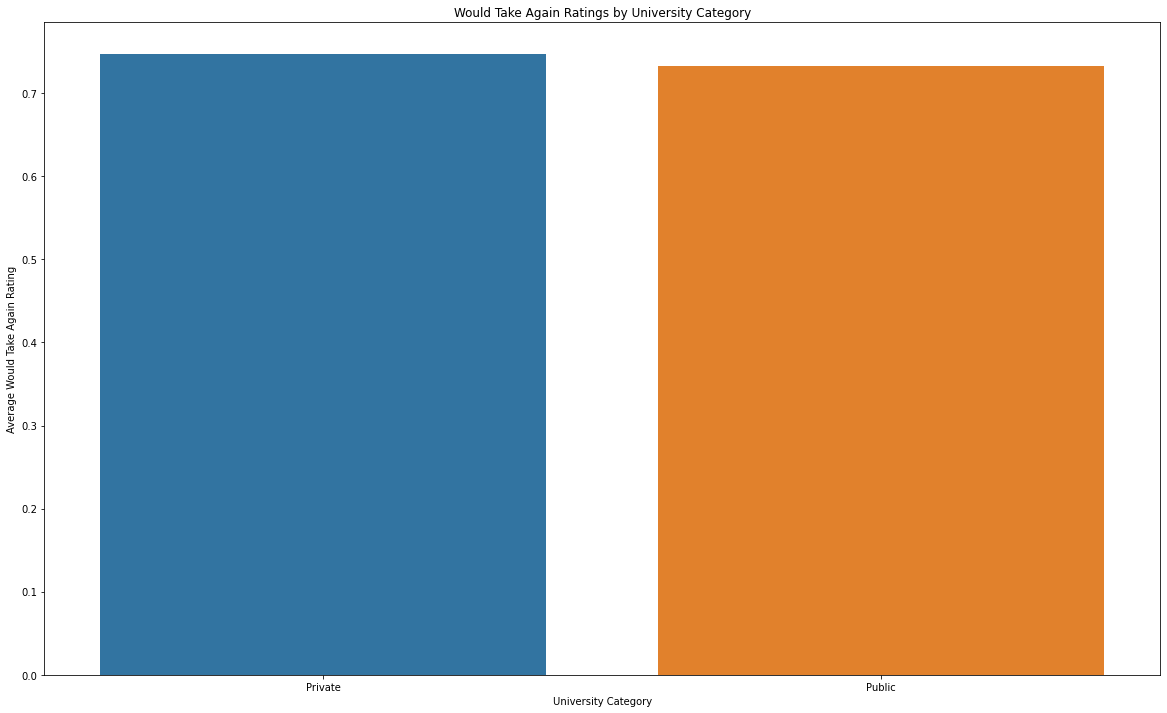

In [146]:
# Plot the data
plt.figure(figsize=(20, 12))
sns.barplot(data=df, x='University_Category', y='wouldTakeAgain_Rating', ci=None)
plt.title('Would Take Again Ratings by University Category')
plt.xlabel('University Category')
plt.ylabel('Average Would Take Again Rating')
plt.show()


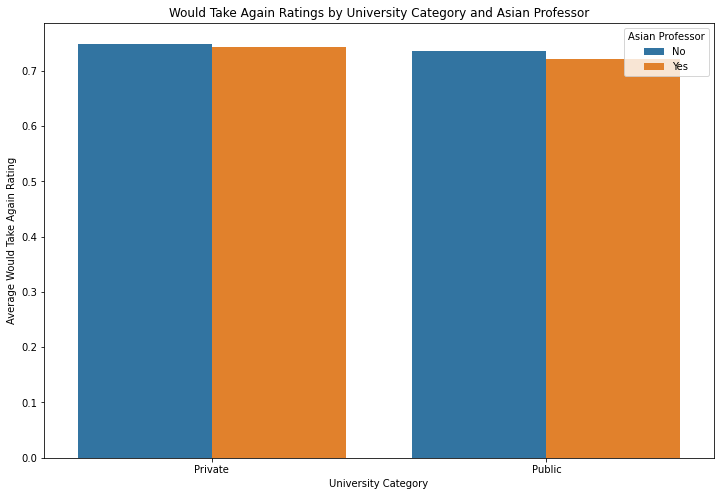

In [147]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='University_Category', y='wouldTakeAgain_Rating', hue='AsianProfessor', ci=None)
plt.title('Would Take Again Ratings by University Category and Asian Professor')
plt.xlabel('University Category')
plt.ylabel('Average Would Take Again Rating')
plt.legend(title='Asian Professor')
plt.show()

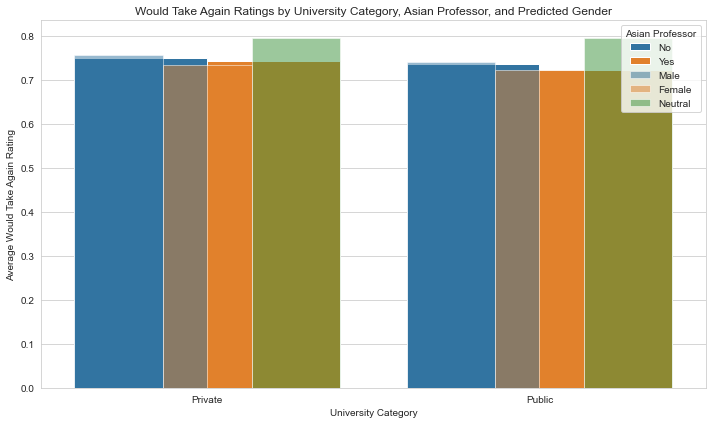

In [150]:
# Set visualization style
sns.set_style("whitegrid")

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='University_Category', y='wouldTakeAgain_Rating', hue='AsianProfessor', ci=None, estimator=np.mean)
sns.barplot(data=df, x='University_Category', y='wouldTakeAgain_Rating', hue='predictedGender', ci=None, alpha=0.5, estimator=np.mean)
plt.title('Would Take Again Ratings by University Category, Asian Professor, and Predicted Gender')
plt.xlabel('University Category')
plt.ylabel('Average Would Take Again Rating')
plt.legend(title='Asian Professor', loc='upper right')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


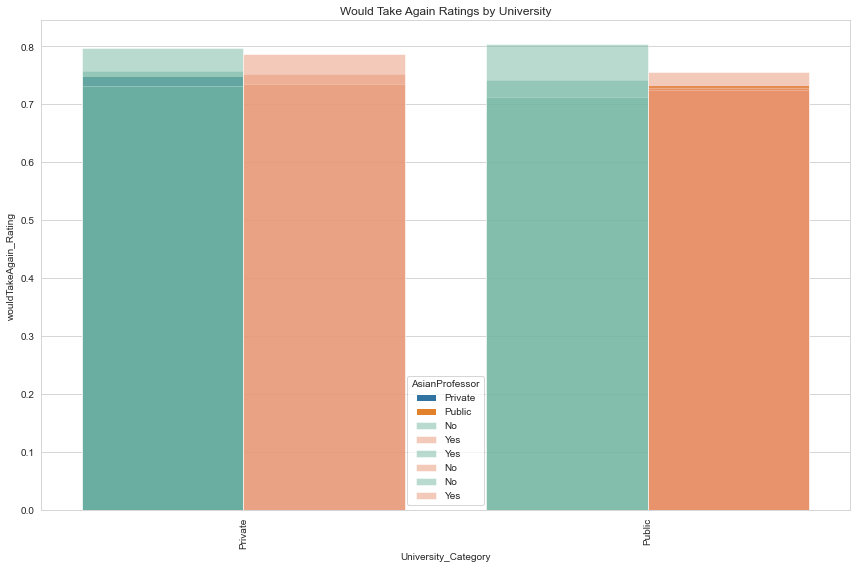

In [157]:
# Set visualization style
sns.set_style("whitegrid")

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='University_Category', y='wouldTakeAgain_Rating', hue='University_Category', dodge=True, ci=None)
plt.title('Would Take Again Ratings by University')
plt.xlabel('University')
plt.ylabel('Average Would Take Again Rating')
plt.legend(title='University Category', loc='upper right')

# Add predicted gender and Asian professor as additional hues
sns.color_palette("colorblind")  # Use a colorblind-friendly palette
for i, gender in enumerate(df['predictedGender'].unique()):
    sns.barplot(data=df[df['predictedGender'] == gender], x='University_Category', y='wouldTakeAgain_Rating', hue='AsianProfessor',
                dodge=True, alpha=0.5, palette="Set2", ci=None)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()